In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import os

In [2]:
title_content = pd.read_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Scrape_Wiki/pre_title_content_newadd.csv')

In [3]:
all_title = title_content['title'].unique()

In [4]:
title_content = title_content.loc[title_content["title"] != "ไฟล์:Crown Prince's Standard of Thailand.svg - วิกิพีเดีย"]

In [ ]:
all_title = title_content['title'].unique()

In [5]:
title_content

,title,content
0,กบฏหวันหมาดหลี - วิกิพีเดีย,การนำทาง
1,กบฏหวันหมาดหลี - วิกิพีเดีย,มีส่วนร่วม
2,กบฏหวันหมาดหลี - วิกิพีเดีย,เครื่องมือ
3,กบฏหวันหมาดหลี - วิกิพีเดีย,พิมพ์/ส่งออก
4,กบฏหวันหมาดหลี - วิกิพีเดีย,สุลต่านอาหมัดทัจจุดินฮาลิมชาฮ์ที่ 2 แห่งไทรบุ...
...,...,...
43726,จังหวัดตะกั่วป่า - วิกิพีเดีย,มีส่วนร่วม
43727,จังหวัดตะกั่วป่า - วิกิพีเดีย,เครื่องมือ
43728,จังหวัดตะกั่วป่า - วิกิพีเดีย,พิมพ์/ส่งออก
43729,จังหวัดตะกั่วป่า - วิกิพีเดีย,เมื่อ พ.ศ. 2352 รัชกาลที่ 2 ทรงยกเมืองตะกั่วป่...


In [ ]:
old_file = os.listdir('/content/drive/MyDrive/Intern_PSU_Phuket/Token_data/at')

In [ ]:
length_string =[]
for index, row in title_content.iterrows():
  length_string.append(len(str(row['content'])))

(array([208.,  85.,  79.,  78.,  43.,  57.,  62.,  82.,  61.,  56.,  51.,
         32.,  58.,  68.,  45.,  36.,  40.,  41.,  54.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

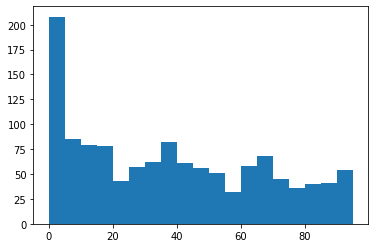

In [ ]:
bins = np.arange(0, 100, 5) 
plt.hist(np.array(length_string),bins=bins)

In [6]:
index_rem = []
for index, row in title_content.iterrows():
  title_content['content'][index] = str(title_content['content'][index]).replace('•','')
  #if '•' in str(row['content']):
  #  index_rem.append(index)
  if '°' in str(row['content']):
    index_rem.append(index)  
  #elif length_string[index] <=36 :
  #  index_rem.append(index)  
  title_content['content'][index] = str(title_content['content'][index]).replace('†','')

In [ ]:
data_new = title_content.drop(index_rem, axis=0)

In [ ]:
data_new

,title,content
0,กบฏหวันหมาดหลี - วิกิพีเดีย,การนำทาง
1,กบฏหวันหมาดหลี - วิกิพีเดีย,มีส่วนร่วม
2,กบฏหวันหมาดหลี - วิกิพีเดีย,เครื่องมือ
3,กบฏหวันหมาดหลี - วิกิพีเดีย,พิมพ์/ส่งออก
4,กบฏหวันหมาดหลี - วิกิพีเดีย,สุลต่านอาหมัดทัจจุดินฮาลิมชาฮ์ที่ 2 แห่งไทรบุ...
...,...,...
43726,จังหวัดตะกั่วป่า - วิกิพีเดีย,มีส่วนร่วม
43727,จังหวัดตะกั่วป่า - วิกิพีเดีย,เครื่องมือ
43728,จังหวัดตะกั่วป่า - วิกิพีเดีย,พิมพ์/ส่งออก
43729,จังหวัดตะกั่วป่า - วิกิพีเดีย,เมื่อ พ.ศ. 2352 รัชกาลที่ 2 ทรงยกเมืองตะกั่วป่...


In [ ]:
for index, row in title_content.iterrows():
  data_new['content'][index] = re.sub("[\(\[].*?[\)\]]", "", str(row['content']))

In [ ]:
data_new = data_new.reset_index(drop=True)

In [ ]:
data

In [ ]:
rem_title =[]
for title in all_title:
  a=title.replace(' - วิกิพีเดีย','')+'.csv'
  if a in old_file:
    rem_title.append(title)

In [ ]:
title_content = title_content.drop(rem_title)

KeyError: ignored

In [ ]:
data_new.to_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Scrape_Wiki/pre_title_content_newadd1.csv',index=False)

In [ ]:
  words = ['ภูมิอากาศ', 'ฝน', 'ฤดู', 'ส่วนท้องถิ่น' ,'เทศบาล' ,'ทางหลวง','ดัชนี','ทันสมัย','นักร้อง','Universe','สื่อ','โทรทัศน์','เว็บไซต์','ภาพยนตร์',
           'บริษัท','ขนส่ง','ท่าอากาศยาน','อุดมศึกษา','รายได้','องศา','ละติจูด','ธุรกิจ','ถนน','วิทยาศาสตร์','โอลิมปิก','ท่าเรือ','ไฟฟ้า']

In [ ]:
def contain_words(sent):
  p=False
  words = ['ทางหลวง','นักร้อง','Universe','สื่อ','โทรทัศน์','เว็บไซต์','ภาพยนตร์',
           'บริษัท','ขนส่ง','ท่าอากาศยาน','อุดมศึกษา','องศา','ละติจูด','ธุรกิจ','ถนน','วิทยาศาสตร์','โอลิมปิก','ท่าเรือ','ไฟฟ้า']
  for i in words:
    if i in sent:
      p=True
  return p

In [ ]:
data_new = title_content

In [ ]:
index_rem = []
for index, row in data_new.iterrows():
  if contain_words(str(row['content'])):
    index_rem.append(index)
  #elif len(str(row['content']))>=1:
    #if str(row['content'])[-6:-1] == 'ดังนี้' or str(row['content'])[-3:-1] == 'คือ' or str(row['content'])[-5:-1] == 'ไปนี้' or str(row['content'])[-1:-3] == 'คือ' :
      #index_rem.append(index)

In [ ]:
data_new1= data_new.drop(index_rem, axis=0)

In [ ]:
data_new1 = data_new1.reset_index(drop=True)

In [ ]:
data_new1.to_csv('/content/drive/MyDrive/Intern_PSU_Phuket/Scrape_Wiki/pre_title_content_new2.csv',index=False)